In [1]:
from fooof.synth import param_iter

In [2]:
param_iter??

In [4]:
import numpy as np
import types
from fooof.synth import gen_group_power_spectra
from fooof import FOOOF, FOOOFGroup
import itertools
from inspect import isgenerator

In [ ]:
slopes = [10, 12, .5]
n_vals = int((slopes[1]-slopes[0]) / slopes[2] + 0)
x = bg_param_iter(0,slopes)

In [ ]:
freqs, powers, _ = gen_group_power_spectra(2,[1,50], x, [] )

In [5]:
FREQ_RANGE = [1,50]
LOW_BAND = [4,8]
HIGH_BAND = [15,25]
DEF_AMP = 1
DEF_BW = 1
DEF_BG = [0,1]
DEF_CF_LOW = np.mean(LOW_BAND)
DEF_CF_HIGH = np.mean(HIGH_BAND)

START_SLOPE = .25
END_SLOPE = 3
SLOPE_INC = .25
SLOPE_PATH = './dat/slope_data'

CF_STATIONARY = 'low'
CF_INC = .1
CF_TRIALS = 50
CF_PATH_LOW = './dat/cf_data_low'
CF_PATH_HIGH = './dat/cf_data_high'

AMP_STATIONARY = 'low'
AMP_INC = .1
END_AMP = 1.5
AMP_TRIALS = 50
AMP_PATH_LOW = './dat/amp_data_low'
AMP_PATH_HIGH = './dat/amp_data_high'

BW_STATIONARY = 'low'
BW_INC = .1
END_BW = 2
BW_TRIALS = 50
BW_PATH_LOW = './dat/bw_data_low'
BW_PATH_HIGH = './dat/bw_data_high'

In [ ]:
# def param_iter(params):
#     """
#     This generator finds which parameter will be iterated through then
#     genertaes those iterations. params is a list given either as 
#     [cf, amp, bw] or [offset, slope]. The intended parameter to iterate
#     over will be replaced with a list in the form of [start, stop, step].
    
#     Parameter
#     ---------
#     params : list
#         each element is a float except the parameter to be iterated over
#         that is a list itself
        
#     Yields
#     -----
#         A 2 element tuple where the first value is a list of the next iterated 
#         parameters and the second element is the length of the generator

#     Example
#     -------
#     Example: if we want to iterate over center frequency values from
#     8 to 12 in increments of .25: params = [[8,12,.25], amp, bw]
#     """

    
#     num_iters = 0
    
#     for i in range(len(params)):
#         if isinstance(params[i], np.ndarray):
#             length = len(params[i])
#             num_iters += 1
#             ind = i
    
#         if num_iters > 1:
#             raise Warning("Iteration is only supported on one parameter")
            
#     temp = params
#     c = ( _param_generator(params,ind,x) for x in params[ind])     
#     return (c, length)

In [ ]:
# def _param_generator(params, ind, chg):
#     params[ind] = chg
#     return params
    

In [6]:
# Generate varying Center Frequency Data
# Low Band
cf_iter_low, cf_n_low = param_iter([np.arange(LOW_BAND[0],LOW_BAND[1],CF_INC),DEF_AMP,DEF_BW])
cf_low_fs, cf_low_ps, cf_low_syns = gen_group_power_spectra(cf_n_low,FREQ_RANGE, DEF_BG, cf_iter_low)
cf_low_save = [cf_low_fs,cf_low_ps,cf_low_syns]
np.save(CF_PATH_LOW,cf_low_save)


# High Band
cf_iter_high, cf_n_high = param_iter([np.arange(HIGH_BAND[0],HIGH_BAND[1],CF_INC),DEF_AMP,DEF_BW])
cf_high_fs, cf_high_ps, cf_high_syns = gen_group_power_spectra(cf_n_high,FREQ_RANGE, DEF_BG, cf_iter_high)
cf_high_save = [cf_high_fs,cf_high_ps,cf_high_syns]
np.save(CF_PATH_HIGH,cf_high_save)





# Generate varying Amplitude Data
# Low Band
amp_iter_low, amp_n_low = param_iter([DEF_CF_LOW, np.arange(.5,END_AMP,AMP_INC),DEF_BW])
amp_low_fs, amp_low_ps, amp_low_syns = gen_group_power_spectra(amp_n_low, FREQ_RANGE, DEF_BG, amp_iter_low)
amp_low_save = [amp_low_fs, amp_low_ps, amp_low_syns]
np.save(AMP_PATH_LOW, amp_low_save)

# High Band
amp_iter_high, amp_n_high = param_iter([DEF_CF_HIGH, np.arange(.5,END_AMP,AMP_INC),DEF_BW])
amp_high_fs, amp_high_ps, amp_high_syns = gen_group_power_spectra(amp_n_high, FREQ_RANGE, DEF_BG, amp_iter_high)
amp_high_save = [amp_high_fs,amp_high_ps,amp_high_syns]
np.save(AMP_PATH_HIGH, amp_high_save)




# Generate varying slope data
sl_iter, sl_n = param_iter([0,np.arange(START_SLOPE,END_SLOPE,SLOPE_INC)])
sl_fs, sl_ps, sl_syns = gen_group_power_spectra(sl_n, FREQ_RANGE,sl_iter,[])
sl_save = [sl_fs,sl_ps,sl_syns]
np.save(SLOPE_PATH, sl_save)

In [ ]:
# Generate varying BandWidth data
# Low Band
bw_iter_low, bw_n_low = param_iter([DEF_CF_LOW, DEF_AMP, np.arange(.5, END_BW, BW_INC)])
bw_low_fs, bw_low_ps, bw_low_syns = gen_group_power_spectra(bw_n_low, FREQ_RANGE, DEF_BG, bw_iter_low)
bw_low_save = [bw_low_fs,bw_low_ps,bw_low_syns]
np.save(BW_PATH_LOW, bw_low_save)


# High Band
bw_iter_high, bw_n_high = param_iter([DEF_CF_HIGH, DEF_AMP, np.arange(.5, END_BW, BW_INC)])
bw_high_fs, bw_high_ps, bw_high_syns = gen_group_power_spectra(bw_n_high, FREQ_RANGE, DEF_BG, bw_iter_high)
bw_high_save = [bw_high_fs,bw_high_ps,bw_high_syns]
np.save(BW_PATH_HIGH, bw_high_save)


### Center Frequency

In [7]:
cf_low = np.load("./dat/cf_data_low.npy")

In [8]:
fg = FOOOFGroup()
fg.add_data(cf_low[0],cf_low[1])
fg.fit()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



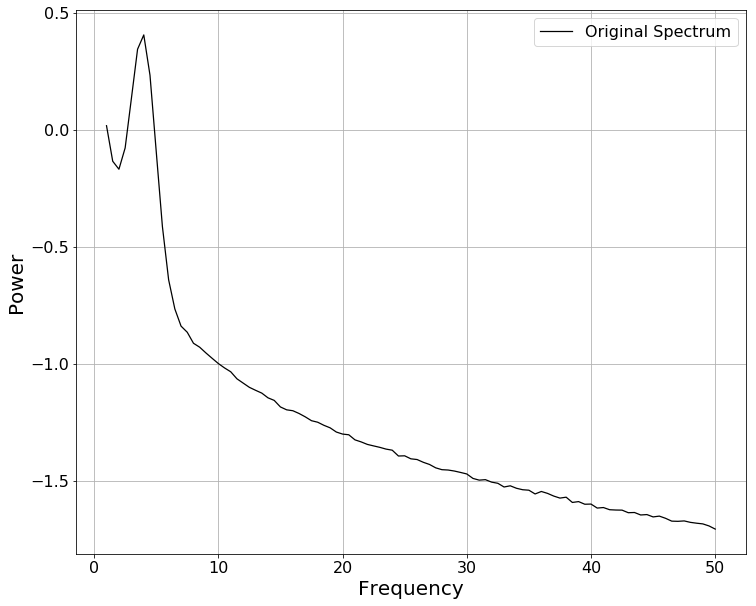

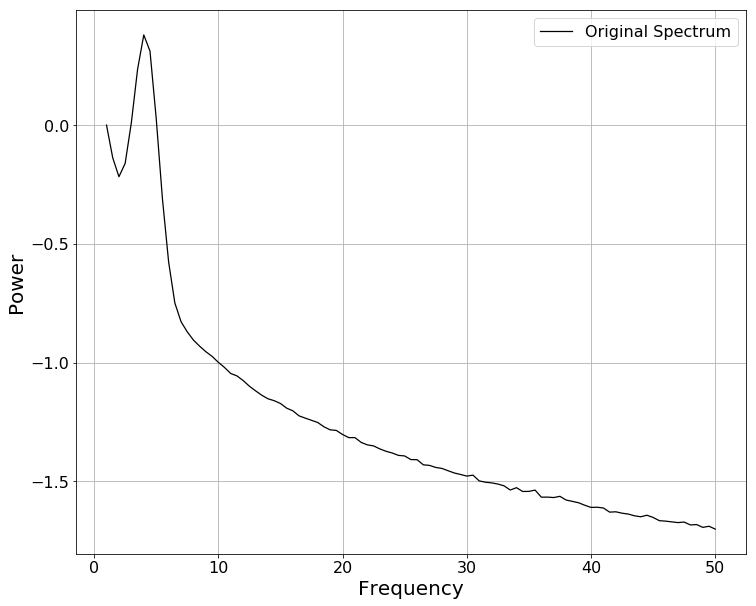

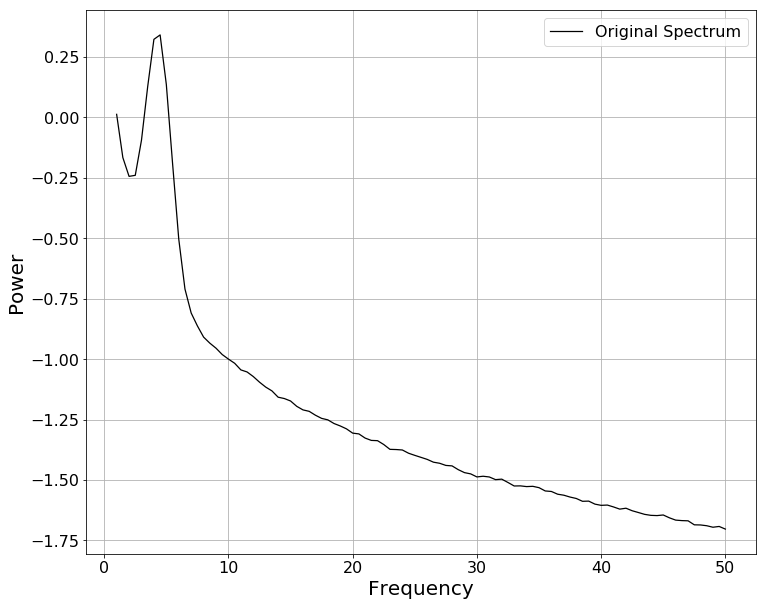

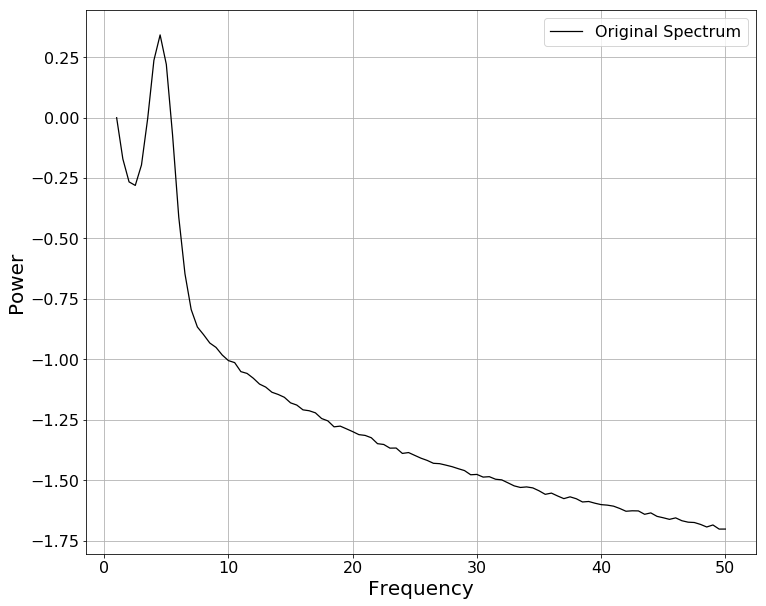

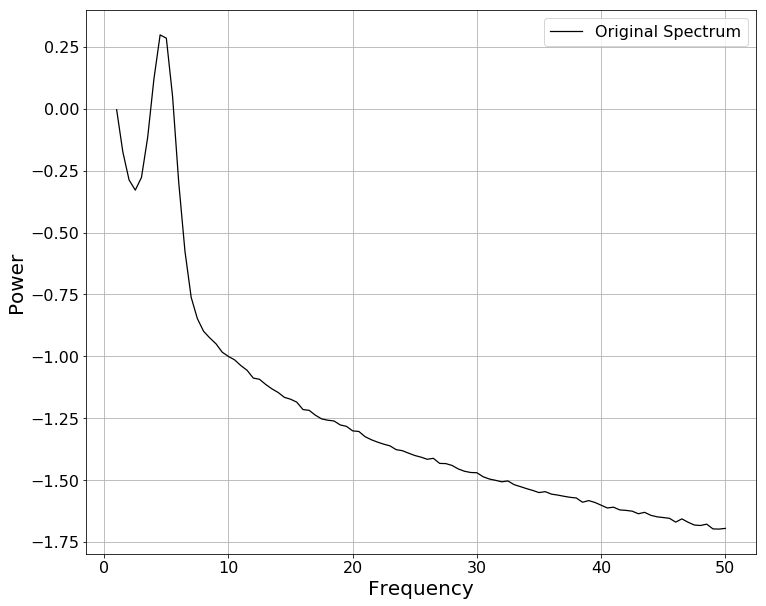

In [9]:
for i in [0,2,4,6,8]:
    fg.get_fooof(i).plot()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



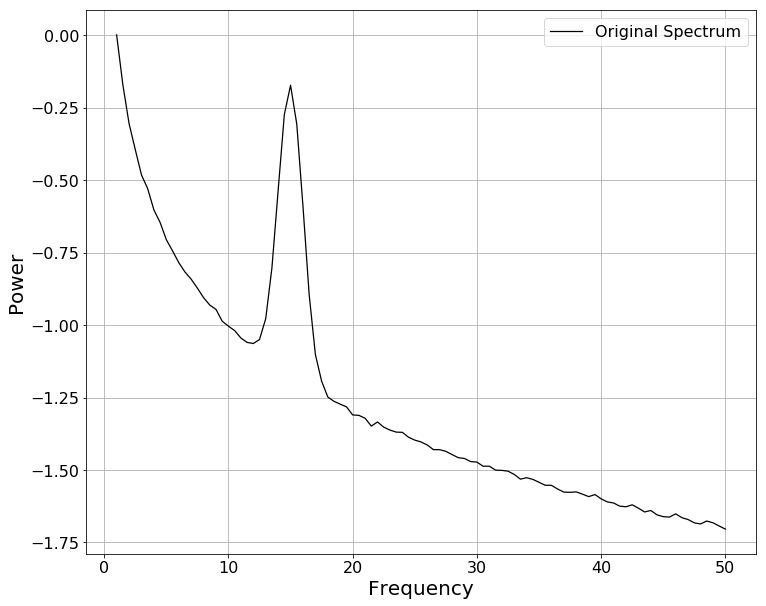

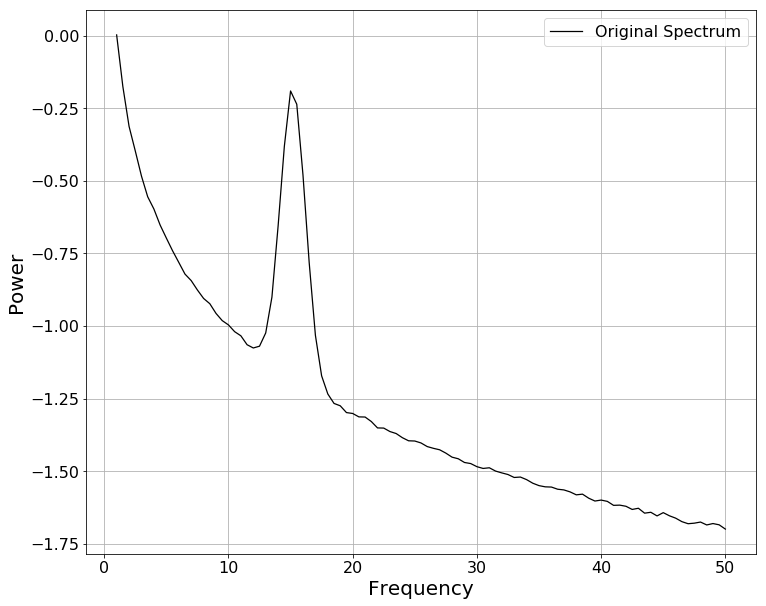

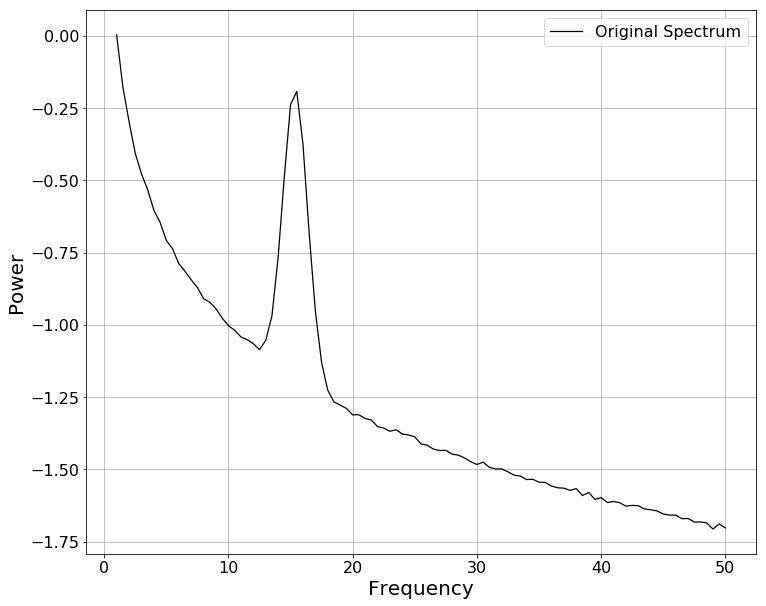

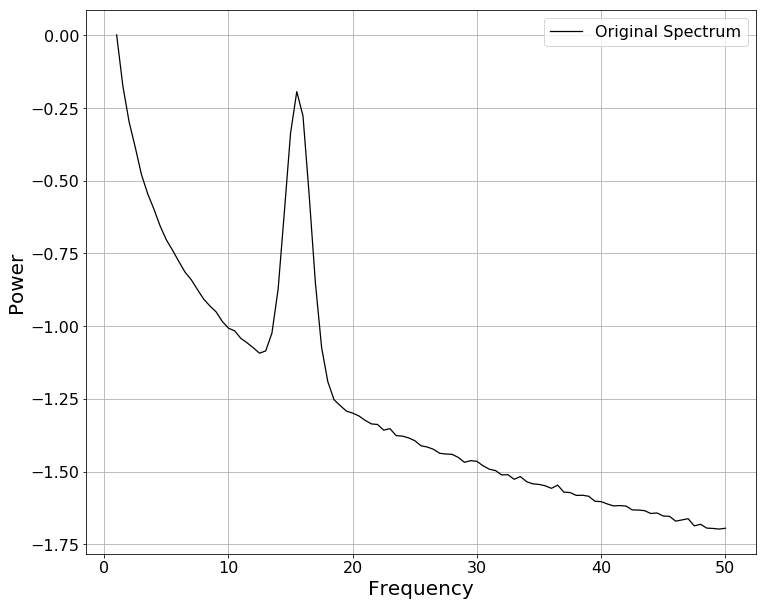

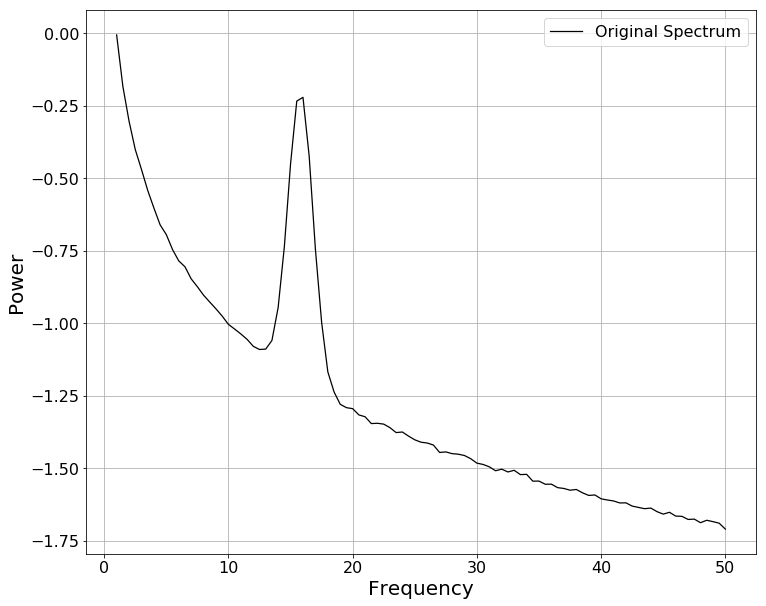

In [10]:
cf_high = np.load("./dat/cf_data_high.npy")

fg = FOOOFGroup()
fg.add_data(cf_high[0],cf_high[1])
fg.fit()

for i in [0,2,4,6,8]:
    fg.get_fooof(i).plot()

### Amplitude

In [11]:
amp_low = np.load("./dat/amp_data_low.npy")

In [12]:
fg = FOOOFGroup()
fg.add_data(amp_low[0],amp_low[1])
fg.fit()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



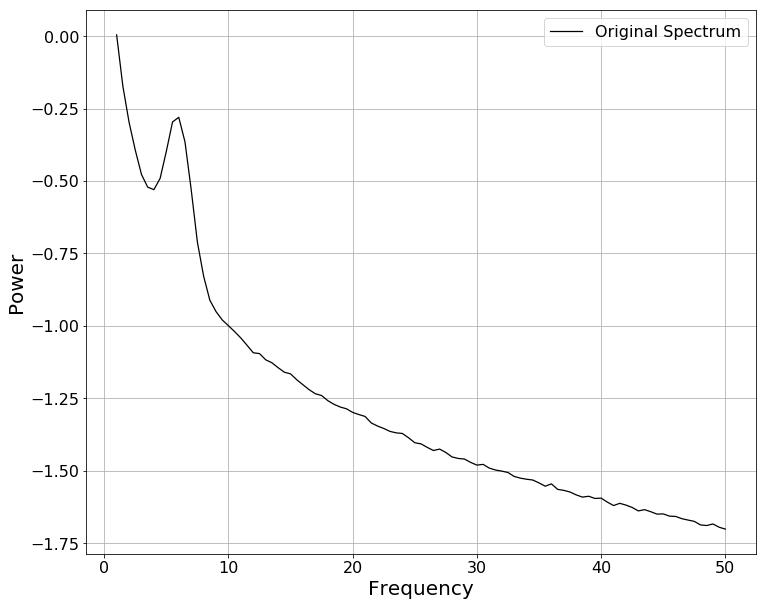

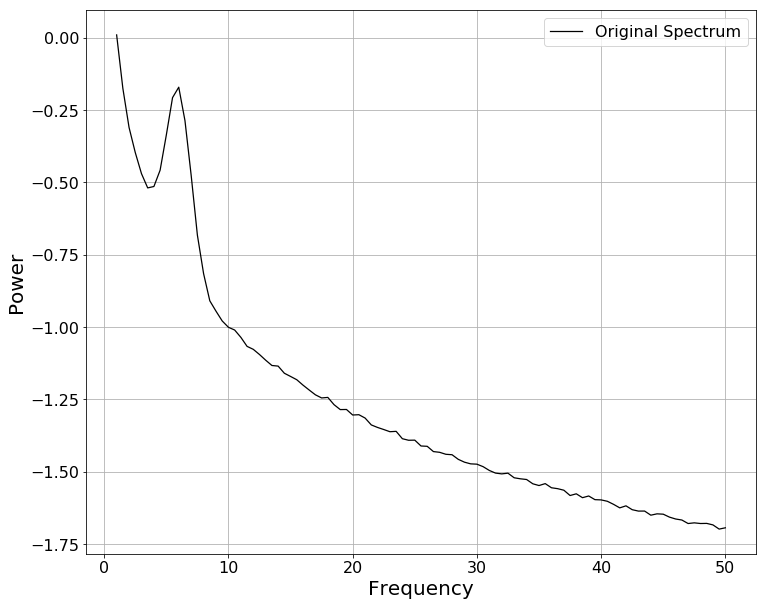

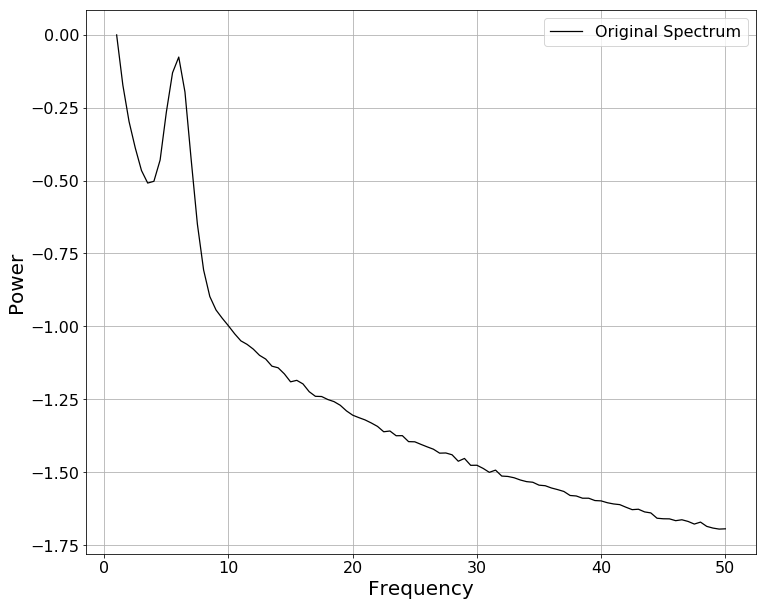

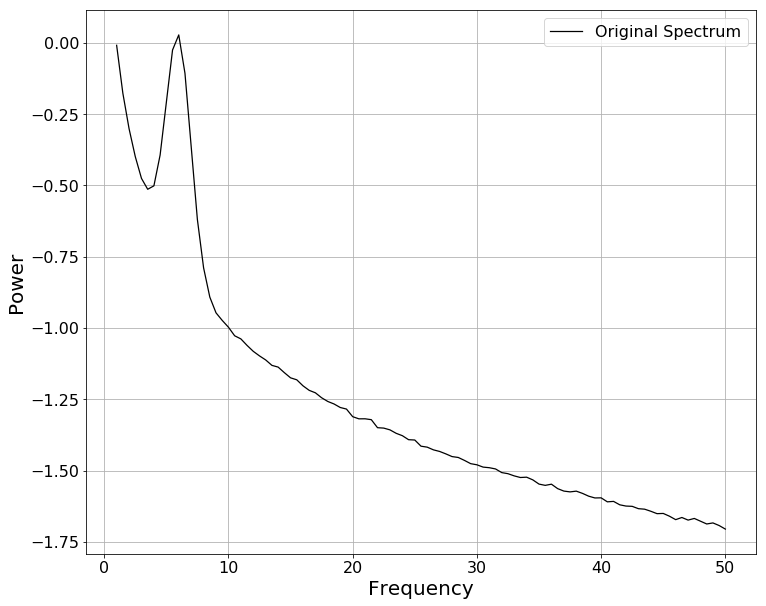

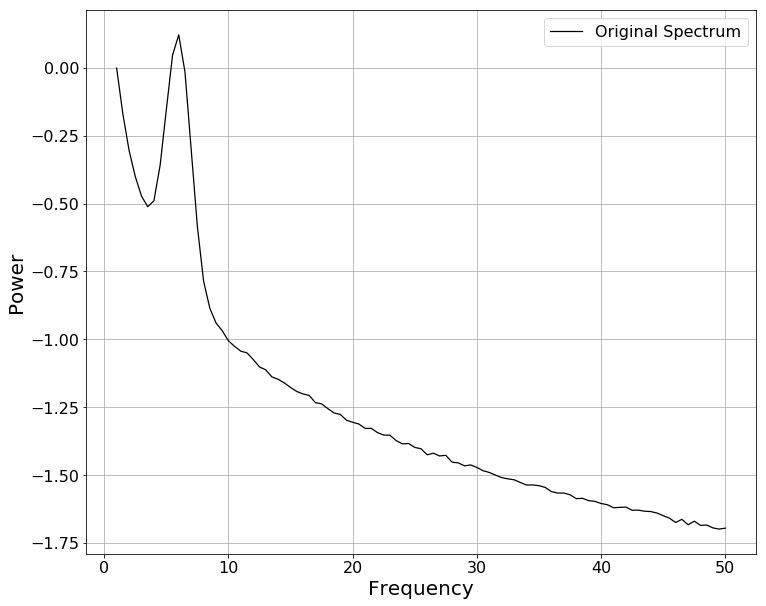

In [13]:
for i in [0,1,2,3,4]:
    fg.get_fooof(i).plot()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



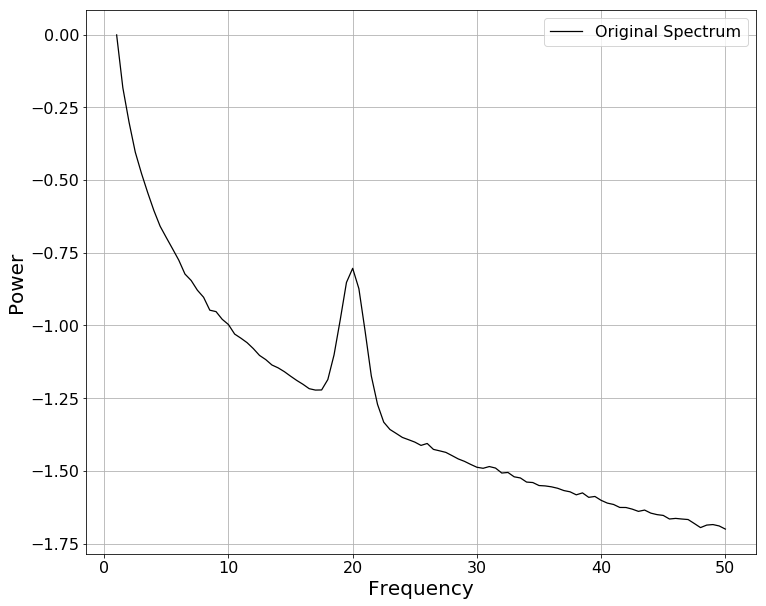

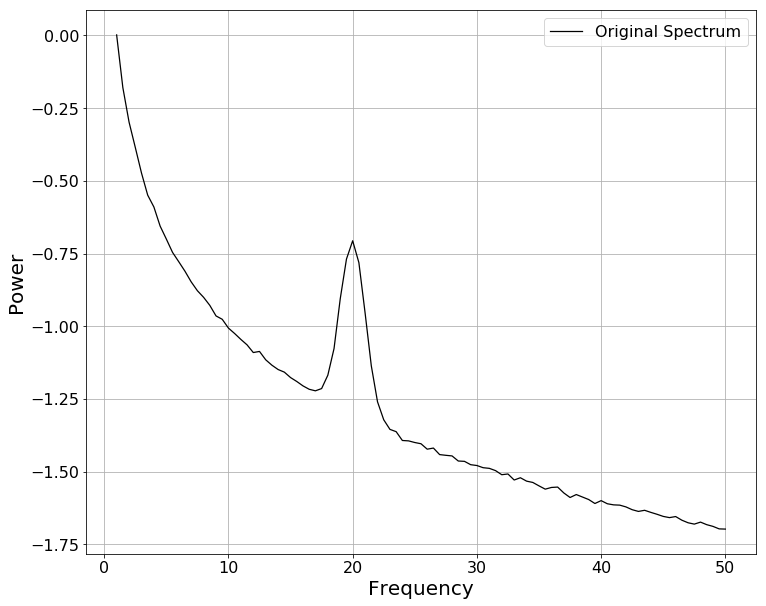

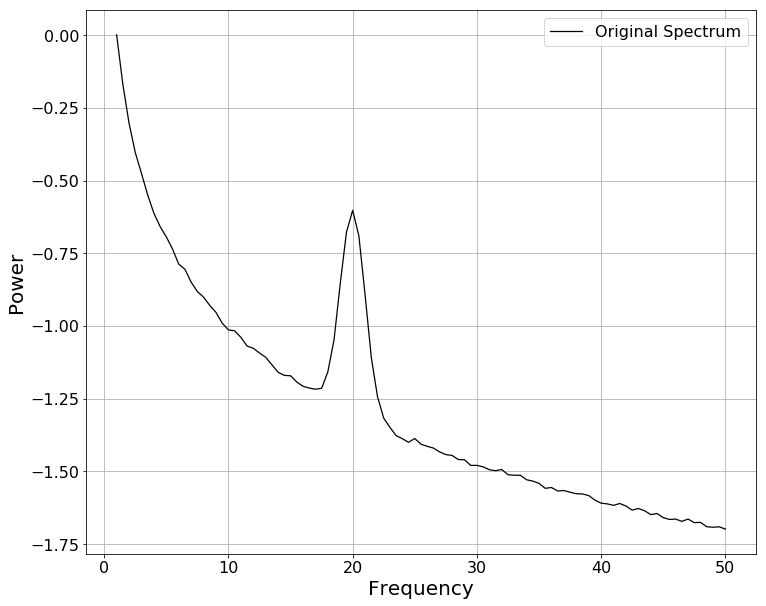

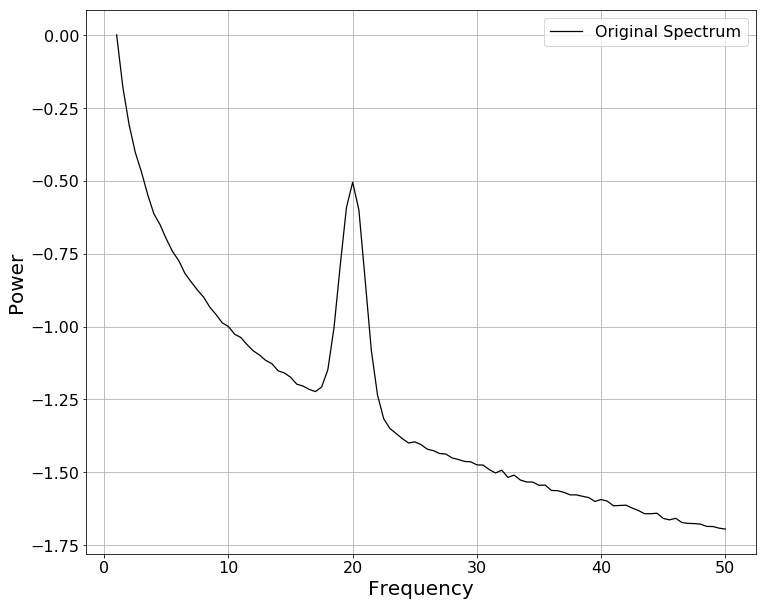

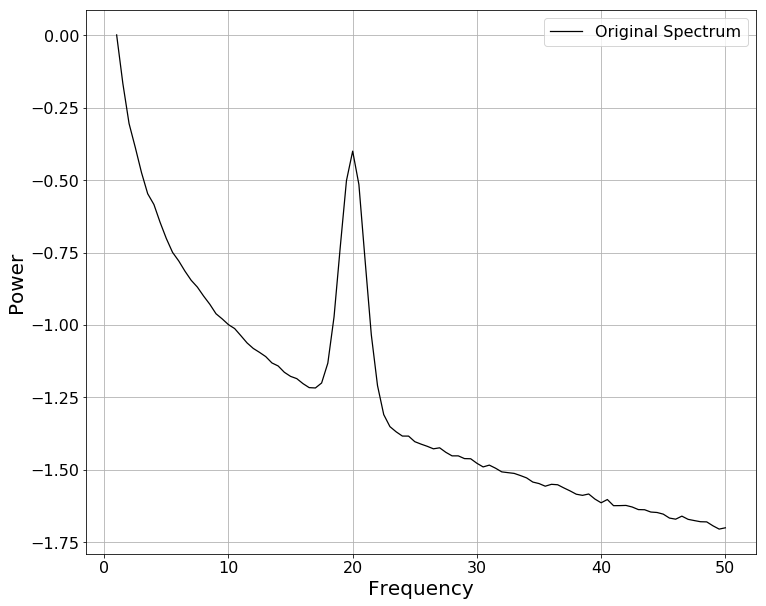

In [14]:
amp_high = np.load("./dat/amp_data_high.npy")

fg = FOOOFGroup()
fg.add_data(amp_high[0],amp_high[1])
fg.fit()

for i in [0,1,2,3,4]:
    fg.get_fooof(i).plot()

### BandWidth


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



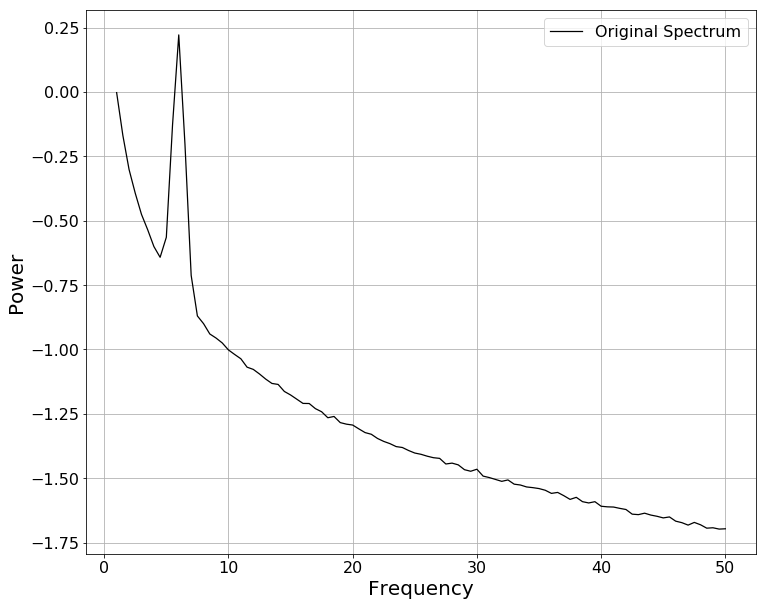

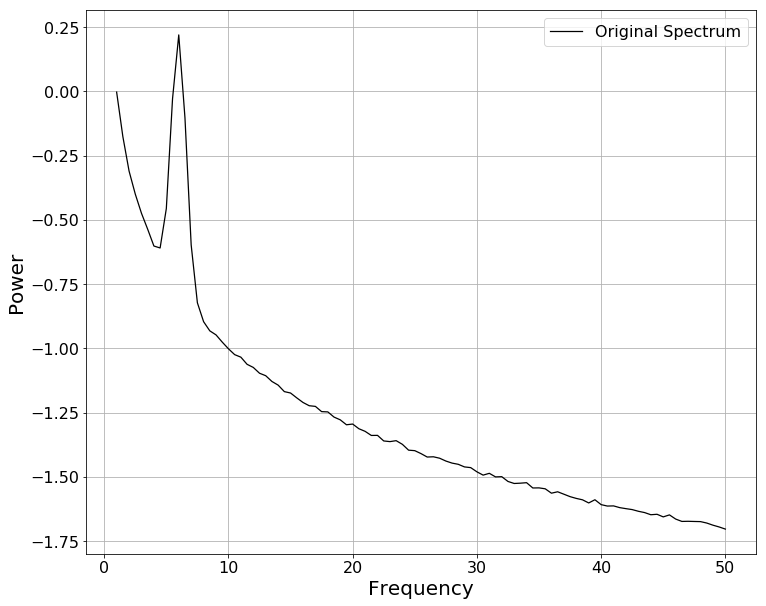

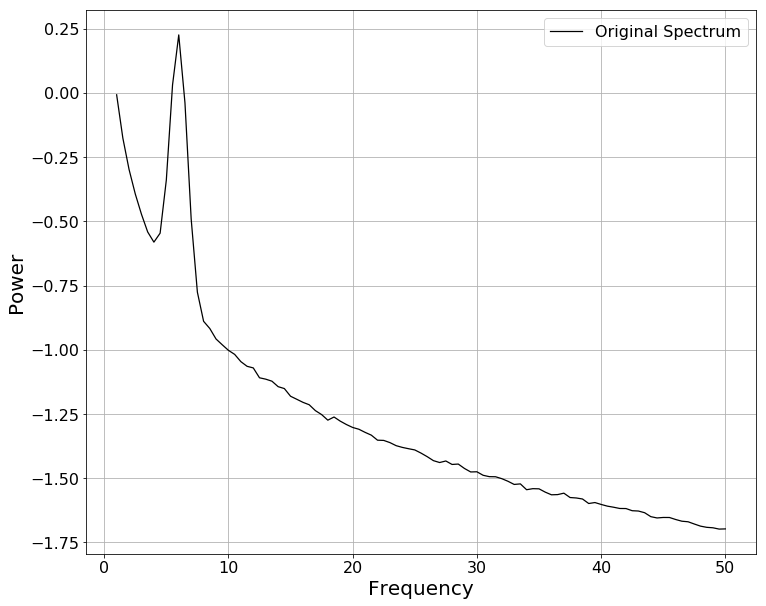

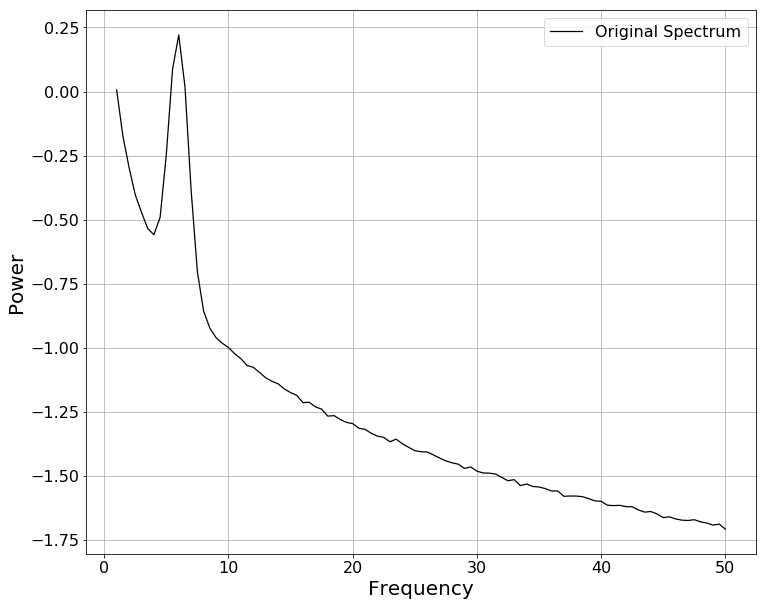

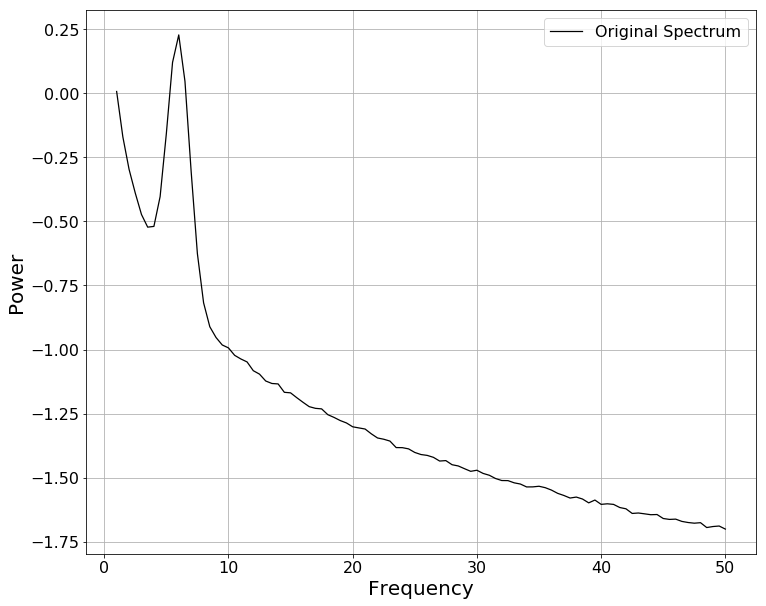

In [15]:
bw_low = np.load("./dat/bw_data_low.npy")

fg = FOOOFGroup()
fg.add_data(bw_low[0],bw_low[1])
fg.fit()

for i in [0,1,2,3,4]:
    fg.get_fooof(i).plot()

In [16]:
bw_low[1]

array([[0.99446116, 0.67873859, 0.50005107, ..., 0.02030893, 0.02007041,
        0.02012359],
       [0.99297886, 0.6668082 , 0.48959665, ..., 0.02049185, 0.02016715,
        0.01978671],
       [0.98397206, 0.6674563 , 0.50373609, ..., 0.02028485, 0.02004847,
        0.02008178],
       ...,
       [1.03594707, 0.72024591, 0.58389073, ..., 0.02061391, 0.02058764,
        0.01994481],
       [1.04679425, 0.74145343, 0.60387123, ..., 0.02052784, 0.02016559,
        0.0200685 ],
       [1.09574246, 0.77332608, 0.631133  , ..., 0.02060347, 0.02019969,
        0.02000035]])

In [17]:
bw_high[1]

NameError: name 'bw_high' is not defined

### Slope

In [ ]:
slope = np.load("./dat/slope_data.npy")

fg = FOOOFGroup()
fg.add_data(slope[0],slope[1])
fg.fit()

for i in [0,1,2,3,4]:
    fg.get_fooof(i).plot()

In [ ]:
L